## Importing libraries

In [4]:
import  zipfile
import glob
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib

## Unzipping the data file

In [5]:
'''
# specifying the zip file name 
file_name = "Dataset.zip"
import  zipfile
# opening the zip file in READ mode 
with zipfile.ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 
	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!')
'''

'\n# specifying the zip file name \nfile_name = "Dataset.zip"\nimport  zipfile\n# opening the zip file in READ mode \nwith zipfile.ZipFile(file_name, \'r\') as zip: \n\t# printing all the contents of the zip file \n\tzip.printdir() \n\t# extracting all the files \n\tprint(\'Extracting all the files now...\') \n\tzip.extractall() \n\tprint(\'Done!\')\n'

## Reading the database


In [6]:
files = glob.glob('youtube-dataset\\*.csv')

In [7]:
files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [8]:
all_df = []
for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'], axis = 1))

In [9]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [10]:
data = pd.concat(all_df, axis = 0 , ignore_index = True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [11]:
data.isnull(
).sum()

CONTENT    0
CLASS      0
dtype: int64

In [12]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

In [13]:
features = data['CONTENT']
target  = data['CLASS']

In [14]:
x_train, x_test , y_train, y_test =  train_test_split( features, target, test_size = 0.2, random_state = 42, stratify = target)

## Tokenizing Youtube Comments


In [15]:
x_test

1160    OMG that looks just like a piece of the mirror...
111                    This song never gets old love it.﻿
263     If you pause at 1:39 at the last millisecond y...
1751                    Check out this video on YouTube:﻿
1491    EMINEM FANS!!!  - Check Out The New Song &quot...
                              ...                        
1658    Youtube comments be like<br />This is so 5 yea...
748                     Very Nice !!!<br />Yeah Fucking.﻿
1845    PLEASE CHECK OUT MY VIDEO CALLED &quot;WE LOVE...
445     this video is very inaccurate, a tiger would r...
1278    You guys should check out this EXTRAORDINARY w...
Name: CONTENT, Length: 391, dtype: object

In [16]:
vectorizer = CountVectorizer()

In [17]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [18]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
x_train_transf.shape

(1564, 3905)

## Performing the classification

In [20]:
clf = MultinomialNB()

In [21]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [22]:
clf.fit(x_train_transf, y_train)

MultinomialNB()

## Performing the evaluation on the test dataset

In [23]:
y_test_pred = clf.predict(x_test_transf)

In [24]:
y_test_pred 

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

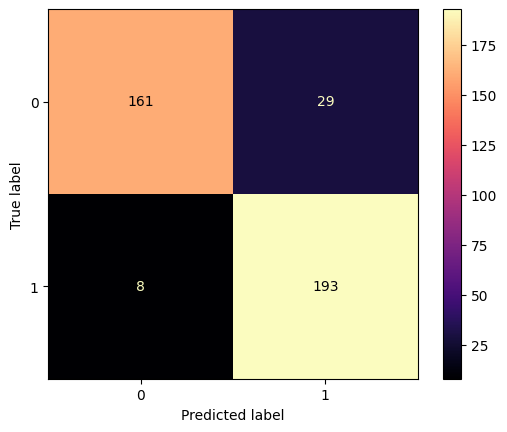

In [25]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [26]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.85      0.90       190
        Spam       0.87      0.96      0.91       201

    accuracy                           0.91       391
   macro avg       0.91      0.90      0.90       391
weighted avg       0.91      0.91      0.90       391

